In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/global-weather-repository")

print("Dataset downloaded to:", path)

C:\Users\nurka\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.11M/3.11M [00:01<00:00, 2.21MB/s]

Extracting files...


Dataset downloaded to: C:\Users\nurka\.cache\kagglehub\datasets\nelgiriyewithana\global-weather-repository\versions\436


In [3]:
df = pd.read_csv(path + '/GlobalWeatherRepository.csv')

df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
print(df.columns)

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


In [5]:
selected = ['temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'uv_index']

training = df[selected]

training.head(5)

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_in,precip_in,humidity,cloud,uv_index
0,26.6,Partly Cloudy,13.3,338,29.89,0.00,24,30,7.0
1,19.0,Partly cloudy,11.2,320,29.88,0.00,94,75,5.0
2,23.0,Sunny,15.1,280,29.85,0.00,29,0,5.0
3,6.3,Light drizzle,11.9,215,29.75,0.01,61,100,2.0
4,26.0,Partly cloudy,13.0,150,29.85,0.00,89,50,8.0


In [6]:
x_feat = [col for col in training.columns if col != 'condition_text']

X = training[x_feat]
y = training['condition_text']

In [7]:
y = y.str.lower()

y.unique()

array(['partly cloudy', 'sunny', 'light drizzle', 'clear', 'overcast',
       'moderate or heavy rain with thunder',
       'patchy light rain in area with thunder', 'fog',
       'patchy light rain with thunder', 'patchy rain nearby',
       'light rain', 'mist', 'cloudy', 'thundery outbreaks in nearby',
       'moderate rain', 'light rain shower', 'moderate rain at times',
       'moderate or heavy rain shower', 'heavy rain at times',
       'patchy light rain', 'patchy light drizzle',
       'thundery outbreaks possible', 'patchy rain possible',
       'moderate or heavy rain in area with thunder', 'heavy rain',
       'torrential rain shower', 'freezing fog',
       'moderate or heavy snow showers', 'light sleet', 'blizzard',
       'moderate snow', 'light snow', 'light sleet showers',
       'light freezing rain', 'heavy snow', 'blowing snow',
       'patchy heavy snow', 'light snow showers',
       'moderate or heavy sleet', 'patchy light snow',
       'patchy moderate snow'], dt

In [8]:
import requests

response = requests.get("https://www.weatherapi.com/docs/weather_conditions.json")

label = pd.DataFrame(response.json())

In [9]:
label_select_dict = {}

for index, row in label.iterrows():
    label_select_dict[row['night'].lower()] = row['code']
    label_select_dict[row['day'].lower()] = row['code']

y_encode = y.map(label_select_dict)

In [10]:
y_encode = y_encode.dropna()

In [11]:
X = X.loc[y_encode.index]

In [12]:
weather_mapping = {
    'Clear': [1000],
    'Cloudy': [1003, 1006, 1009],
    'Drizzle': [1150, 1153, 1168, 1171, 1180],
    'Rain': [1063, 1183, 1186, 1189, 1192, 1195, 1240, 1243, 1246, 1198, 1201], 
    'Storm/Thunder': [1087, 1273, 1276, 1279, 1282],
    'Snow': [1066, 1210, 1213, 1216, 1219, 1222, 1225, 1255, 1258, 1261, 1264,],
    'Sleet': [1069, 1072, 1204, 1207, 1249, 1252],
    'Fog': [1030, 1135, 1147],
    'Extreme Weather': [1114, 1117, 1237]
}

flat_mapping = {code: category for category, codes in weather_mapping.items() for code in codes}

y_encode_transform = y_encode.map(flat_mapping)

In [13]:
label_counts = pd.DataFrame(y_encode_transform).value_counts()
print(label_counts)

condition_text 
Cloudy             17737
Clear              14248
Rain                2768
Fog                 1337
Storm/Thunder        627
Drizzle              416
Snow                  88
Sleet                 15
Extreme Weather        5
Name: count, dtype: int64


In [14]:
encode_label = {
    'Clear': 0,
    'Cloudy': 1,
    'Drizzle': 2,
    'Rain': 3,
    'Storm/Thunder': 4,
    'Snow': 5,
    'Sleet': 6,
    'Fog': 7,
    'Extreme Weather': 8
}

y_encoded = y_encode_transform.map(encode_label)

In [15]:
X.iloc[0]

temperature_celsius     26.60
wind_kph                13.30
wind_degree            338.00
pressure_in             29.89
precip_in                0.00
humidity                24.00
cloud                   30.00
uv_index                 7.00
Name: 0, dtype: float64

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=4, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

pd.DataFrame(y_resampled).value_counts()

condition_text
0                 17737
1                 17737
2                 17737
3                 17737
4                 17737
5                 17737
6                 17737
7                 17737
8                 17737
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((127706, 8), (31927, 8), (127706,), (31927,))

In [18]:
scaler = tf.keras.layers.Normalization(axis=-1)
scaler.adapt(np.array(x_train))

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    scaler,
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax'),    
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48)             │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,602 (25.79 KB)

 Trainable params: 6,265 (24.47 KB)

 Non-trainable params: 337 (1.32 KB)

In [21]:
class CustomEarlyStopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if logs['accuracy'] >= 0.890 and logs['val_accuracy'] >= 0.885:
            self.model.stop_training = True

custom_early_stopping = CustomEarlyStopping()

In [22]:
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), verbose=1, callbacks=[custom_early_stopping])

Epoch 1/100
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6372 - loss: 1.0894 - val_accuracy: 0.7780 - val_loss: 0.6235
Epoch 2/100
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7661 - loss: 0.6408 - val_accuracy: 0.7940 - val_loss: 0.5653
Epoch 3/100
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7859 - loss: 0.5808 - val_accuracy: 0.8049 - val_loss: 0.5317
Epoch 4/100
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7968 - loss: 0.5504 - val_accuracy: 0.8105 - val_loss: 0.5110
Epoch 5/100
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8021 - loss: 0.5308 - val_accuracy: 0.8188 - val_loss: 0.4934
Epoch 6/100
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8079 - loss: 0.5197 - val_accuracy: 0.8279 - val_loss: 0.4802
Epoch 7/100
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8130 - loss: 0.5091 - val_accuracy: 0.8313 - val_loss: 0.4667
Epoch 8/100
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8196 - loss: 

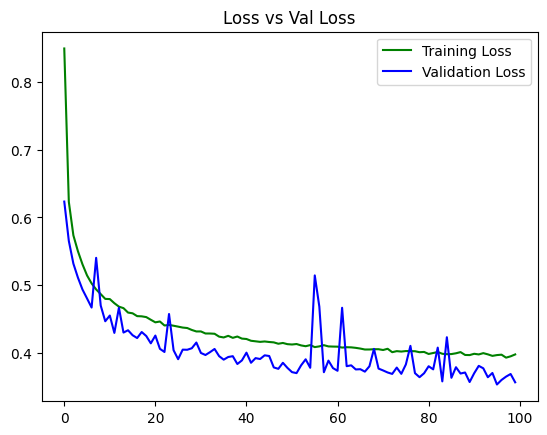

In [23]:
plt.plot(history.history['loss'], color='g', label='Training Loss')
plt.plot(history.history['val_loss'], color='b', label='Validation Loss')
plt.title("Loss vs Val Loss")
plt.legend()
plt.show()

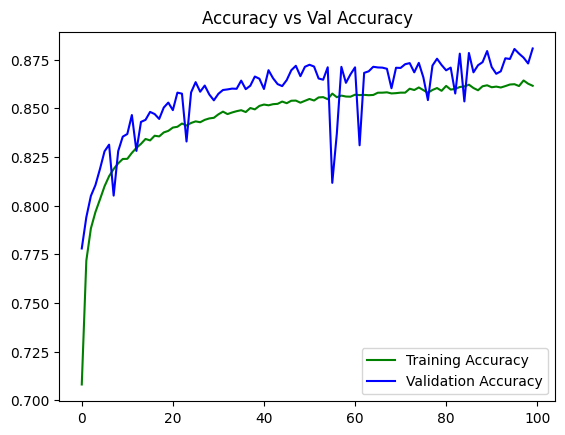

In [24]:
plt.plot(history.history['accuracy'], color='g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.title("Accuracy vs Val Accuracy")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

998/998 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3468
           1       0.78      0.65      0.71      3445
           2       0.84      0.92      0.88      3570
           3       0.77      0.67      0.72      3606
           4       0.76      0.91      0.83      3551
           5       0.99      1.00      0.99      3554
           6       0.99      1.00      1.00      3624
           7       0.85      0.83      0.84      3543
           8       1.00      1.00      1.00      3566

    accuracy                           0.88     31927
   macro avg       0.88      0.88      0.88     31927
weighted avg       0.88      0.88      0.88     31927



In [26]:
# model.save('model/classification.keras')